### IMAGE COLOUR RECOGNITION MINI PROJECT USING OPENCV

In [6]:
#importing necessary libraries

import cv2
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from collections import Counter

In [29]:
#Utility function

def rgb2hex(rgb):
    hex = '#{:02x}{:02x}{:02x}'.format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
print(rgb2hex([127,127,127]))

#7f7f7f


In [62]:
def image_colors(path, k = 8):
    img = cv2.imread(path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    #resizing image
    resized_img_rgb = cv2.resize(img_rgb, (64,64))
    
    #reshaping the image
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1],3))
    
    clust = KMeans(n_clusters=k)
    labels = clust.fit_predict(img_list)
    
    #count labels to find popular colors
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())
    
    centers = list(clust.cluster_centers_)
    ordered_colors = [centers[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    #plotting
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    #plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors)
    plt.axis('equal')
    plt.show()

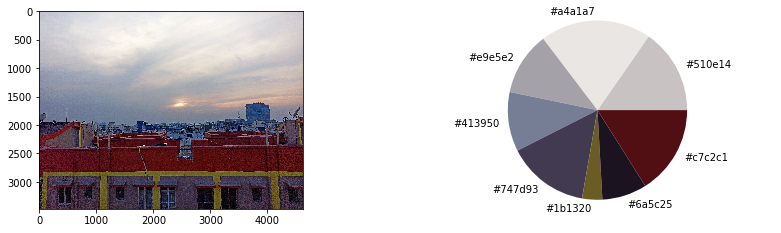

In [63]:
image_colors("../pics/1.jpg")

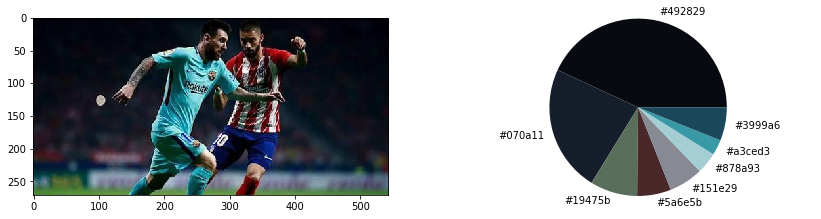

In [64]:
image_colors("../pics/4.jpg")

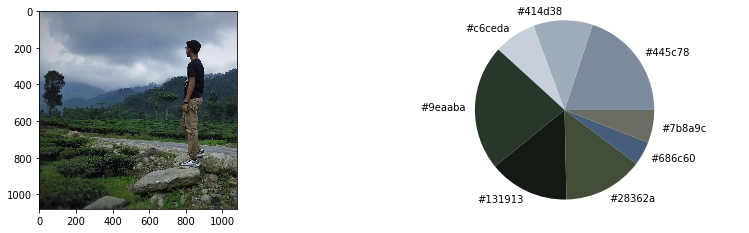

In [65]:
image_colors("../pics/5.jpg")

# THE END